Jamison Hunter

June 12, 2023

# IMDB Data Exploration

In [1]:
# Imports
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# loading tmdb data
df_2000 = pd.read_csv(r"Data/final_tmdb_data_2000.csv.gz")
df_2001 = pd.read_csv(r"Data/final_tmdb_data_2001.csv.gz")

In [3]:
df_2000.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1249 entries, 0 to 1248
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                1249 non-null   object 
 1   adult                  1248 non-null   float64
 2   backdrop_path          697 non-null    object 
 3   belongs_to_collection  117 non-null    object 
 4   budget                 1248 non-null   float64
 5   genres                 1248 non-null   object 
 6   homepage               63 non-null     object 
 7   id                     1248 non-null   float64
 8   original_language      1248 non-null   object 
 9   original_title         1248 non-null   object 
 10  overview               1227 non-null   object 
 11  popularity             1248 non-null   float64
 12  poster_path            1130 non-null   object 
 13  production_companies   1248 non-null   object 
 14  production_countries   1248 non-null   object 
 15  rele

In [4]:
df_2001.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1345 entries, 0 to 1344
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                1345 non-null   object 
 1   adult                  1344 non-null   float64
 2   backdrop_path          729 non-null    object 
 3   belongs_to_collection  93 non-null     object 
 4   budget                 1344 non-null   float64
 5   genres                 1344 non-null   object 
 6   homepage               108 non-null    object 
 7   id                     1344 non-null   float64
 8   original_language      1344 non-null   object 
 9   original_title         1344 non-null   object 
 10  overview               1318 non-null   object 
 11  popularity             1344 non-null   float64
 12  poster_path            1213 non-null   object 
 13  production_companies   1344 non-null   object 
 14  production_countries   1344 non-null   object 
 15  rele

In [5]:
# combining the two frames into a single data frame
df_tmdb = pd.concat([df_2000, df_2001])
df_tmdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2594 entries, 0 to 1344
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                2594 non-null   object 
 1   adult                  2592 non-null   float64
 2   backdrop_path          1426 non-null   object 
 3   belongs_to_collection  210 non-null    object 
 4   budget                 2592 non-null   float64
 5   genres                 2592 non-null   object 
 6   homepage               171 non-null    object 
 7   id                     2592 non-null   float64
 8   original_language      2592 non-null   object 
 9   original_title         2592 non-null   object 
 10  overview               2545 non-null   object 
 11  popularity             2592 non-null   float64
 12  poster_path            2343 non-null   object 
 13  production_companies   2592 non-null   object 
 14  production_countries   2592 non-null   object 
 15  rele

In [6]:
df_rev = df_tmdb["revenue"] > 0 
df_tmdb[df_rev].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 449 entries, 4 to 1291
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                449 non-null    object 
 1   adult                  449 non-null    float64
 2   backdrop_path          429 non-null    object 
 3   belongs_to_collection  98 non-null     object 
 4   budget                 449 non-null    float64
 5   genres                 449 non-null    object 
 6   homepage               59 non-null     object 
 7   id                     449 non-null    float64
 8   original_language      449 non-null    object 
 9   original_title         449 non-null    object 
 10  overview               449 non-null    object 
 11  popularity             449 non-null    float64
 12  poster_path            448 non-null    object 
 13  production_companies   449 non-null    object 
 14  production_countries   449 non-null    object 
 15  relea

In [7]:
df_bud = df_tmdb["budget"] > 0
df_tmdb[df_bud].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 546 entries, 1 to 1320
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                546 non-null    object 
 1   adult                  546 non-null    float64
 2   backdrop_path          461 non-null    object 
 3   belongs_to_collection  102 non-null    object 
 4   budget                 546 non-null    float64
 5   genres                 546 non-null    object 
 6   homepage               68 non-null     object 
 7   id                     546 non-null    float64
 8   original_language      546 non-null    object 
 9   original_title         546 non-null    object 
 10  overview               544 non-null    object 
 11  popularity             546 non-null    float64
 12  poster_path            529 non-null    object 
 13  production_companies   546 non-null    object 
 14  production_countries   546 non-null    object 
 15  relea

In [8]:
num = df_tmdb[df_rev]["revenue"].value_counts().sum()
print(f"There are {num} movies with valid revenue information available.")

There are 449 movies with valid revenue information available.


In [9]:
num = df_tmdb[df_bud]["budget"].value_counts().sum()
print(f"There are {num} movies with valid budget information available.")

There are 546 movies with valid budget information available.


In [10]:
# finding the film within the data with the highest budget
x = df_tmdb[df_bud]["budget"].max()
df_max = df_tmdb["budget"] == x
df_tmdb[df_max]

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
162,tt0213149,0.0,/zv1xOEQzebKyku349qDZ085FZlO.jpg,NaN,140000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 10752, '...",NaN,676.0,en,Pearl Harbor,...,449220945.0,183.0,"[{'english_name': 'French', 'iso_639_1': 'fr',...",Released,It takes a moment to change history. It takes ...,Pearl Harbor,0.0,6.933,5831.0,PG-13


In [11]:
# setting the style for seaborn graphs
plt.style.use(['dark_background','seaborn-muted', 'seaborn-poster'])

Text(0.5, 0, 'Number of Certifications')

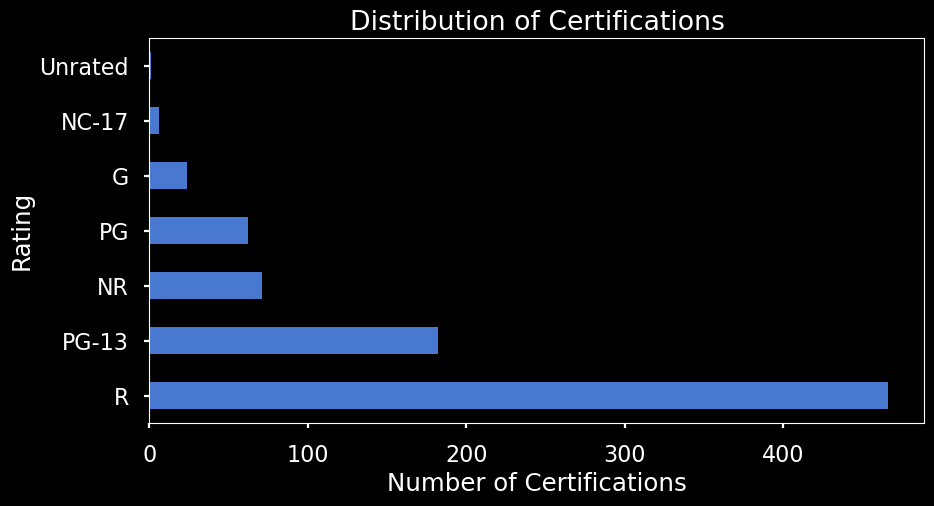

In [12]:
# generating a bar graph of certifications
fig, ax = plt.subplots(figsize=(10,5))
ax = df_tmdb["certification"].value_counts().plot(kind = "barh")
ax.set_title("Distribution of Certifications")
ax.set_ylabel("Rating")
ax.set_xlabel("Number of Certifications")

In [13]:
# writing a for loop in order to find the average of the data's certifications
for i in df_tmdb["certification"].unique():
    x = df_tmdb["certification"] == i
    avg = df_tmdb[x]["revenue"].mean()
    print(f"The average revenue for {i} films is {avg}")

The average revenue for nan films is nan
The average revenue for PG films is 62480125.85483871
The average revenue for R films is 16259918.066523606
The average revenue for G films is 73352975.5
The average revenue for NR films is 2295879.7746478873
The average revenue for PG-13 films is 71465436.48901099
The average revenue for NC-17 films is 0.0
The average revenue for Unrated films is 0.0


In [14]:
# writing a for loop in order to find the average of the data's certifications
for i in df_tmdb["certification"].unique():
    x = df_tmdb["certification"] == i
    avg = df_tmdb[x]["budget"].mean()
    print(f"The average budget for {i} films is {avg}")

The average budget for nan films is nan
The average budget for PG films is 25306407.0
The average budget for R films is 9684129.721030043
The average budget for G films is 23833333.333333332
The average budget for NR films is 1509015.4084507043
The average budget for PG-13 films is 30945922.675824177
The average budget for NC-17 films is 0.0
The average budget for Unrated films is 0.0


In [15]:
# referencing previous Data folder and saving the combined frame as a csv file
FOLDER = "Data/"
os.makedirs(FOLDER, exist_ok=True)
os.listdir(FOLDER)
df_tmdb.to_csv(f"{FOLDER}tmdb_results_combined.csv.gz")